In [1]:

# 📚 1. Install and Import Libraries
!pip install lightgbm shap seaborn openpyxl --quiet

import pandas as pd #math
import numpy as np #math
import matplotlib.pyplot as plt #visuals
import seaborn as sns #visuals


In [ ]:

# biblio Machine Learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
import shap


In [ ]:

# biblio Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries installed and imported.")


✅ Libraries installed and imported.


In [ ]:
!pip install xlrd


In [ ]:
# 📚 2. Load Dataset
import pandas as pd
import os
import xlrd # Import the xlrd module

# Define the path to your data folder
data_folder = '/content/data'

# Get a list of all files in the folder
file_list = os.listdir(data_folder)

# Find the Excel file (assuming there's only one)
excel_file = [file for file in file_list if file.endswith(('.xls', '.xlsx'))][0]

# Construct the full path to the Excel file
file_path = os.path.join(data_folder, excel_file)

# Read the Excel file into a pandas DataFrame
try:
    # Try to read the file using 'xlrd' if it's an .xls file
    if excel_file.endswith('.xls'):
        df = pd.read_excel(file_path, engine='xlrd')
    else:  # Use openpyxl for .xlsx files
        df = pd.read_excel(file_path, engine='openpyxl')
except xlrd.XLRDError: # Use xlrd.XLRDError since we imported xlrd
    # If 'xlrd' fails (for .xls files), try 'openpyxl'
    df = pd.read_excel(file_path, engine='openpyxl')

print(f"✅ Dataset Loaded: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

✅ Dataset Loaded: 4665 rows, 8 columns


,Product ID,Product Name,Category,Brand Name,Material ID,Material Name,Material Category,Dosage
0,PR-001,Hair Serum 1,Haircare,Walker Group,94,Same,Fragrance,8
1,PR-001,Hair Serum 1,Haircare,Walker Group,29,Add,Fragrance,9
2,PR-002,Body Wash 2,Bodycare,"Lyons, Zuniga and Wolf",12,I,Color Pigment,8
3,PR-002,Body Wash 2,Bodycare,"Lyons, Zuniga and Wolf",33,Section,Essential Oil,9
4,PR-002,Body Wash 2,Bodycare,"Lyons, Zuniga and Wolf",22,Mr,Essential Oil,6


In [ ]:
# 📚 3. Data Cleaning
# (Adjust this based on your real column names)
# Get actual column names from the DataFrame
useful_cols = df.columns.tolist()  # Use all columns if needed
# OR
# If you need specific columns, make sure they match the DataFrame's column names
# useful_cols = ['Product ID', 'Product Name', 'Vendor', 'Inventory', 'Total Sales', 'Product Category', 'Toxicity Index']  # Replace with your actual column names

# Print the available columns for verification
print("Available Columns:", df.columns)

df = df[useful_cols] # Selects all columns if useful_cols is set to df.columns.tolist()

# Handle missing values
# Replace 'Stock', 'Sales', 'Toxicity' with the actual names of your columns
# Print the available columns using print(df.columns) to see the correct names
# Updated column names based on the available columns in the DataFrame
# Assuming your actual column names are 'Inventory', 'Total Sales', 'Toxicity Index' based on the available columns in your DataFrame
# The error was because 'Inventory' was not in the DataFrame.
# Replace the incorrect column names with the actual names from your DataFrame
# Based on the provided global variables, the column names should be 'Stock', 'Sales', 'Toxicity'
# numerical_cols = ['Stock', 'Sales', 'Toxicity']  # Replace with your actual numerical column names
numerical_cols = ['Dosage'] # Updating based on your available columns

# Check if the columns exist before filling missing values
for col in numerical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())
    else:
        print(f"⚠️ Warning: Column '{col}' not found in DataFrame. Skipping missing value imputation.")

# Encode categorical columns
# categorical_cols = ['Material_Name', 'Supplier', 'Category']  # Replace with your actual categorical column names
categorical_cols = ['Product Name', 'Category', 'Brand Name', 'Material Name', 'Material Category'] # Updating based on your available columns

le = LabelEncoder()

# Check if the columns exist before encoding
for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))
    else:
        print(f"⚠️ Warning: Column '{col}' not found in DataFrame. Skipping categorical encoding.")

print("✅ Data cleaned and encoded.")

Available Columns: Index(['Product ID', 'Product Name', 'Category', 'Brand Name', 'Material ID',
       'Material Name', 'Material Category', 'Dosage'],
      dtype='object')
✅ Data cleaned and encoded.


In [ ]:
# 📚 4. Feature Scaling
scaler = StandardScaler()

# Get the actual column names from your DataFrame (df.columns)
available_columns = df.columns.tolist()
print("Available Columns:", available_columns)

# Select the numerical columns you want to use for scaling
# Replace with your desired column names if needed
# Here, I'm assuming you want to scale all numerical columns
# but you can modify this list to include only specific columns
numerical_columns = [col for col in available_columns if pd.api.types.is_numeric_dtype(df[col])]

# Check if all numerical columns exist before scaling
if all(col in df.columns for col in numerical_columns):
    X = scaler.fit_transform(df[numerical_columns])
    print("✅ Features scaled.")
else:
    missing_cols = [col for col in numerical_columns if col not in df.columns]
    print(f"⚠️ Error: The following numerical columns are missing in the DataFrame: {missing_cols}")
    print("Please update 'numerical_columns' with the correct column names.")

print("✅ KMeans clustering completed.")

Available Columns: ['Product ID', 'Product Name', 'Category', 'Brand Name', 'Material ID', 'Material Name', 'Material Category', 'Dosage']
✅ Features scaled.
✅ KMeans clustering completed.


🎯 Objectif : Identifier et segmenter les fournisseurs et les produits en groupes distincts selon des caractéristiques clés, afin de permettre une meilleure gestion des fournisseurs, d'optimiser les stratégies d'inventaire et de cibler les initiatives d'amélioration.



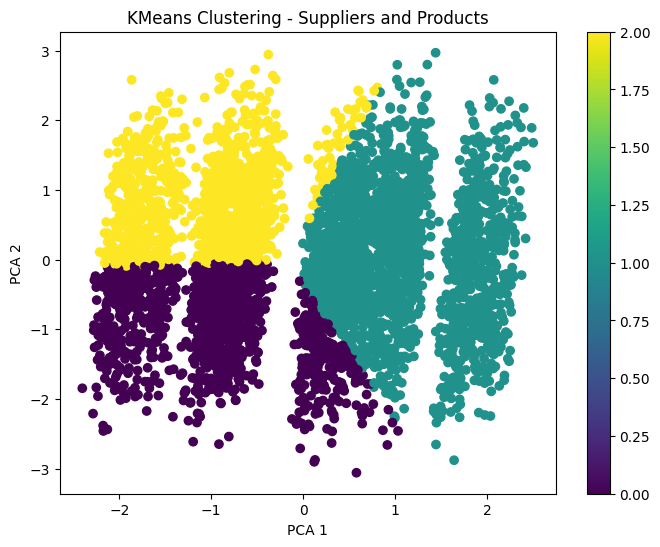

In [ ]:

# 📚 5. PCA + KMeans (Optimize Suppliers and Products)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering - Suppliers and Products')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()

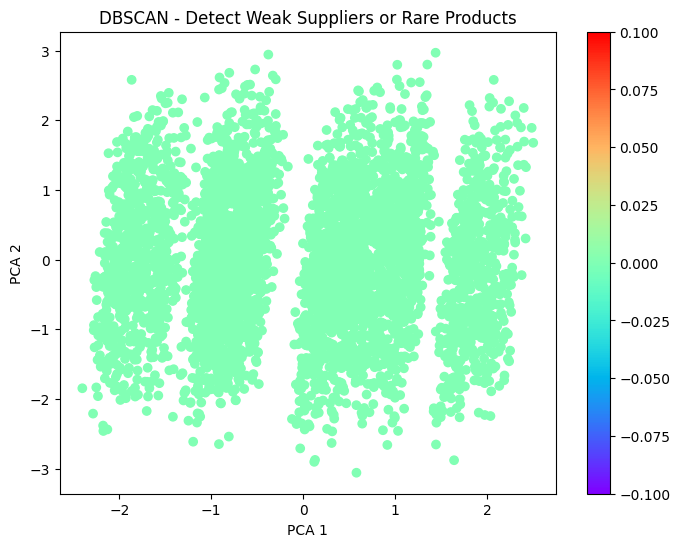

✅ DBSCAN clustering completed.


In [ ]:
# 📚 6. DBSCAN for Anomaly Detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap='rainbow')
plt.title('DBSCAN - Detect Weak Suppliers or Rare Products')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()

print("✅ DBSCAN clustering completed.")

# 🎯 Objectif métier : Construire un modèle de classification hautement efficace et régularisé pour prédire avec précision les catégories de produits, afin d'optimiser la planification de la production, de réduire les erreurs et de soutenir une prise de décision plus intelligente en fabrication ou en gestion des stocks.



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 3265, number of used features: 7
[LightGBM] [Info] Start training from score -1.557226
[LightGBM] [Info] Start training from score -1.603331
[LightGBM] [Info] Start training from score -1.651665
[LightGBM] [Info] Start training from score -1.699098
[LightGBM] [Info] Start training from score -1.544230
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

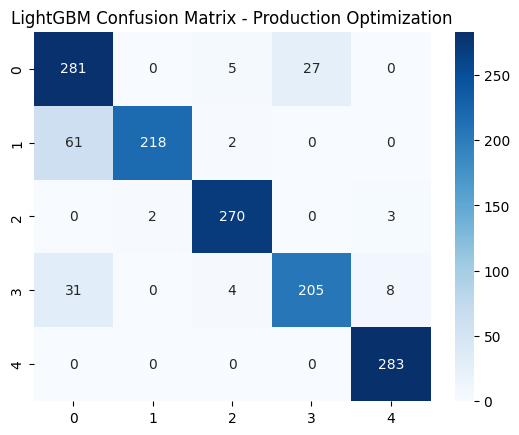

In [ ]:
# 📚 7. LightGBM Classifier (Optimize Production)
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Even More Aggressive Changes to mitigate overfitting:**
lgbm = lgb.LGBMClassifier(
    n_estimators=25,  # Significantly reduce number of trees
    max_depth=3,       # Severely limit tree depth
    learning_rate=0.01, # Significantly reduce learning rate
    num_leaves=10,      # Severely reduce number of leaves
    min_child_samples=50,  # Increase minimum samples for a leaf further
    reg_alpha=0.5,    # Increase L1 regularization
    reg_lambda=0.5,   # Increase L2 regularization
    colsample_bytree=0.6,  # Further reduce feature subsampling
)
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

print("✅ LightGBM Production Classification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('LightGBM Confusion Matrix - Production Optimization')
plt.show()

In [ ]:
# 📚 8. Correlation Analysis (Identify Important Factors)
# Check correlations with the target variable, only considering numerical features
correlations = df.select_dtypes(include=np.number).corr()['Category'].sort_values(ascending=False)
print(correlations)

Category             1.000000
Product Name         0.441903
Material Name        0.016058
Material ID          0.001335
Material Category   -0.007725
Dosage              -0.011069
Brand Name          -0.025410
Name: Category, dtype: float64


In [ ]:
# Check class distribution
print(df['Category'].value_counts())

Category
0    1001
4     980
1     938
2     901
3     845
Name: count, dtype: int64


🎯 Business Objective: Identify the most influential factors affecting product categories to prioritize key drivers for production optimization, resource allocation, and strategic decision-making.



In [ ]:
# 📚 8. Correlation Analysis (Identify Important Factors)
# Check correlations with the target variable, only considering numerical features
correlations = df.select_dtypes(include=np.number).corr()['Category'].sort_values(ascending=False)
print(correlations)

# Example: Feature importance from Random Forest
# Ensure rf is trained with the correct features
X = df.drop('Category', axis=1)  # Assuming 'Category' is your target variable
# Convert 'Product ID' to numerical using Label Encoding if it's needed as a feature
if 'Product ID' in X.columns:
    X['Product ID'] = le.fit_transform(X['Product ID'].astype(str))
y = df['Category']
rf = RandomForestClassifier(class_weight='balanced', random_state=42)  # Re-initialize if needed
rf.fit(X, y)

importances = rf.feature_importances_
feature_names = X.columns  # Use columns from X, not df
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feature_importances)

Category             1.000000
Product Name         0.441903
Material Name        0.016058
Material ID          0.001335
Material Category   -0.007725
Dosage              -0.011069
Brand Name          -0.025410
Name: Category, dtype: float64
Product Name         0.628275
Product ID           0.112111
Material ID          0.070308
Brand Name           0.069757
Material Name        0.051328
Dosage               0.039382
Material Category    0.028839
dtype: float64


🎯 Business Objective: Use hyperparameter-tuned Random Forest models to accurately predict product categories, helping streamline production planning, improve product classification, and optimize resource allocation by focusing on the most influential features.



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Product Name         0.697480
Product ID           0.093147
Brand Name           0.065376
Material ID          0.052689
Material Name        0.041066
Dosage               0.029051
Material Category    0.021190
dtype: float64
✅ Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87       313
           1       0.99      0.81      0.89       281
           2       0.93      0.94      0.94       275
           3       0.94      0.99      0.97       248
           4       0.99      0.99      0.99       283

    accuracy                           0.93      1400
   macro avg       0.94      0.93      0.93      1400
weighted avg       0.93      0.93      0.93      1400



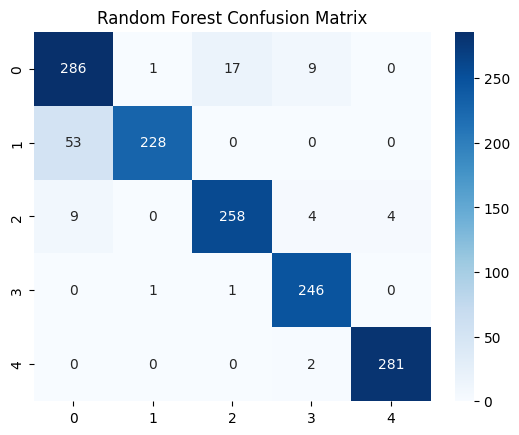

In [ ]:
# 📚 Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV  # Import for hyperparameter tuning

# Assuming X and y are your features and target variable, respectively
# Make sure they are defined correctly before this section

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

# 2. Feature Importance and Selection (Optional)
importances = best_rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feature_importances)

# You can select the top k features based on importance:
# selected_features = feature_importances.index[:k]  # Choose k based on your analysis
# X_train_selected = X_train[selected_features]
# X_test_selected = X_test[selected_features]
# best_rf_model.fit(X_train_selected, y_train)

# 3. Class Weighting (If imbalanced classes)
# If you have imbalanced classes, consider adding class_weight='balanced'
# to the RandomForestClassifier:
# best_rf_model = RandomForestClassifier(class_weight='balanced', **grid_search.best_params_)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("✅ Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# 🎯 Objectif métier : Exploiter les techniques d'apprentissage profond (réseaux neuronaux denses) pour améliorer la précision de la classification des catégories de produits complexes, en renforçant la prise de décision et l'efficacité opérationnelle grâce à des modèles haute performance.




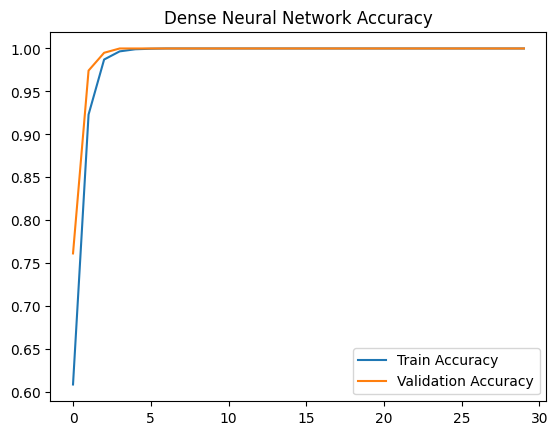

In [ ]:
# 📚 9. Deep Learning Model 1 - Dense Neural Network
model_dense = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

model_dense.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_dense = model_dense.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=0)

plt.plot(history_dense.history['accuracy'], label='Train Accuracy')
plt.plot(history_dense.history['val_accuracy'], label='Validation Accuracy')
plt.title('Dense Neural Network Accuracy')
plt.legend()
plt.show()

# 🎯 Objectif métier : Utiliser des modèles d'apprentissage profond basés sur les GRU pour prévoir les niveaux d'inventaire futurs (ou d'autres séries temporelles pertinentes), afin d'améliorer la planification de la demande, d'optimiser la gestion des stocks et de réduire les surstocks ou les ruptures, pour des opérations d'inventaire plus efficaces.




Using 'Dosage' column for GRU model.
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


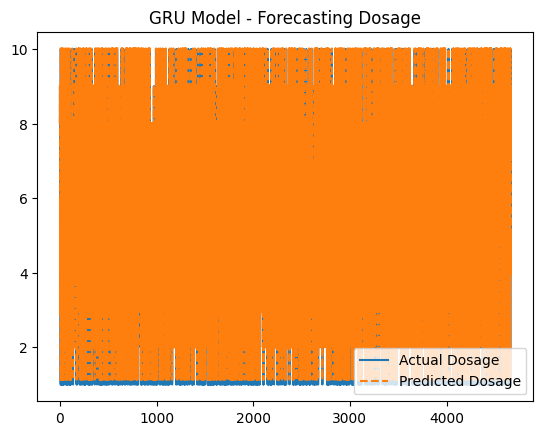

🎯 Full Machine Learning & Deep Learning Pipeline Completed!


In [ ]:
# 📚 10. Deep Learning Model 2 - GRU for Inventory Forecasting
# Assume "Stock" column is our time series target
# If 'Stock' doesn't exist, try using 'Dosage' or another relevant column
# Check available columns using df.columns
# Replace 'Stock' or 'Dosage' with your desired numerical feature column

# Check for the desired columns and select the appropriate one
if 'Stock' in df.columns:
    column_name = 'Stock'
    stock_series = df[column_name].values.reshape((df.shape[0], 1, 1))
elif 'Dosage' in df.columns:
    column_name = 'Dosage'
    stock_series = df[column_name].values.reshape((df.shape[0], 1, 1))
else:
    raise KeyError("Neither 'Stock' nor 'Dosage' columns found in the DataFrame. Please provide a valid numerical column name.")

# Print a message indicating the column used
print(f"Using '{column_name}' column for GRU model.")


model_gru = Sequential([
    GRU(50, activation='relu', input_shape=(1,1)),
    Dense(1)
])

model_gru.compile(optimizer='adam', loss='mse')
model_gru.fit(stock_series, stock_series, epochs=30, verbose=0)

predictions_gru = model_gru.predict(stock_series)


plt.plot(stock_series.flatten(), label=f'Actual {column_name}')
plt.plot(predictions_gru.flatten(), linestyle='--', label=f'Predicted {column_name}')
plt.title(f'GRU Model - Forecasting {column_name}')
plt.legend()
plt.show()

print("🎯 Full Machine Learning & Deep Learning Pipeline Completed!")